# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import cv2 as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display

import tensorflow as tf
from tensorflow import keras

import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

2021-10-17 19:52:00.961119: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
base_dir = '/kaggle/input/cryptopunks/'
os.listdir(base_dir)

['txn_history-2021-10-07.jsonl', 'imgs']

In [3]:
data_dir = '../input/cryptopunks/txn_history-2021-10-07.jsonl'
image_dir = "../input/cryptopunks/imgs/imgs"
image_root = "../input/cryptopunks/imgs"

In [4]:
df = pd.read_json(base_dir + 'txn_history-2021-10-07.jsonl', lines=True)
df.head()

txn_type      from to       date  timestamp     source    eth  \
0  Bid Withdrawn  0xe73a1d    2021-09-04 2021-09-04  larvalabs  321.0   
1            Bid  0xe73a1d    2021-09-01 2021-09-01  larvalabs  321.0   
2  Bid Withdrawn  0x2e5e22    2021-09-01 2021-09-01  larvalabs  320.0   
3            Bid  0x2e5e22    2021-09-01 2021-09-01  larvalabs  320.0   
4  Bid Withdrawn  0x2e5e22    2021-09-01 2021-09-01  larvalabs  263.0   

   punk_id from_wallet_address to_wallet_address      type  \
0        0                None              None  [Female]   
1        0                None              None  [Female]   
2        0                None              None  [Female]   
3        0                None              None  [Female]   
4        0                None              None  [Female]   

                               accessories  
0  [Green Eye Shadow, Earring, Blonde Bob]  
1  [Green Eye Shadow, Earring, Blonde Bob]  
2  [Green Eye Shadow, Earring, Blonde Bob]  
3  [Green Eye Shadow, Earring, Blonde Bob]  
4  [Green Eye Shadow, Earring, Blonde Bob]

Sample 100 CryptoPunks


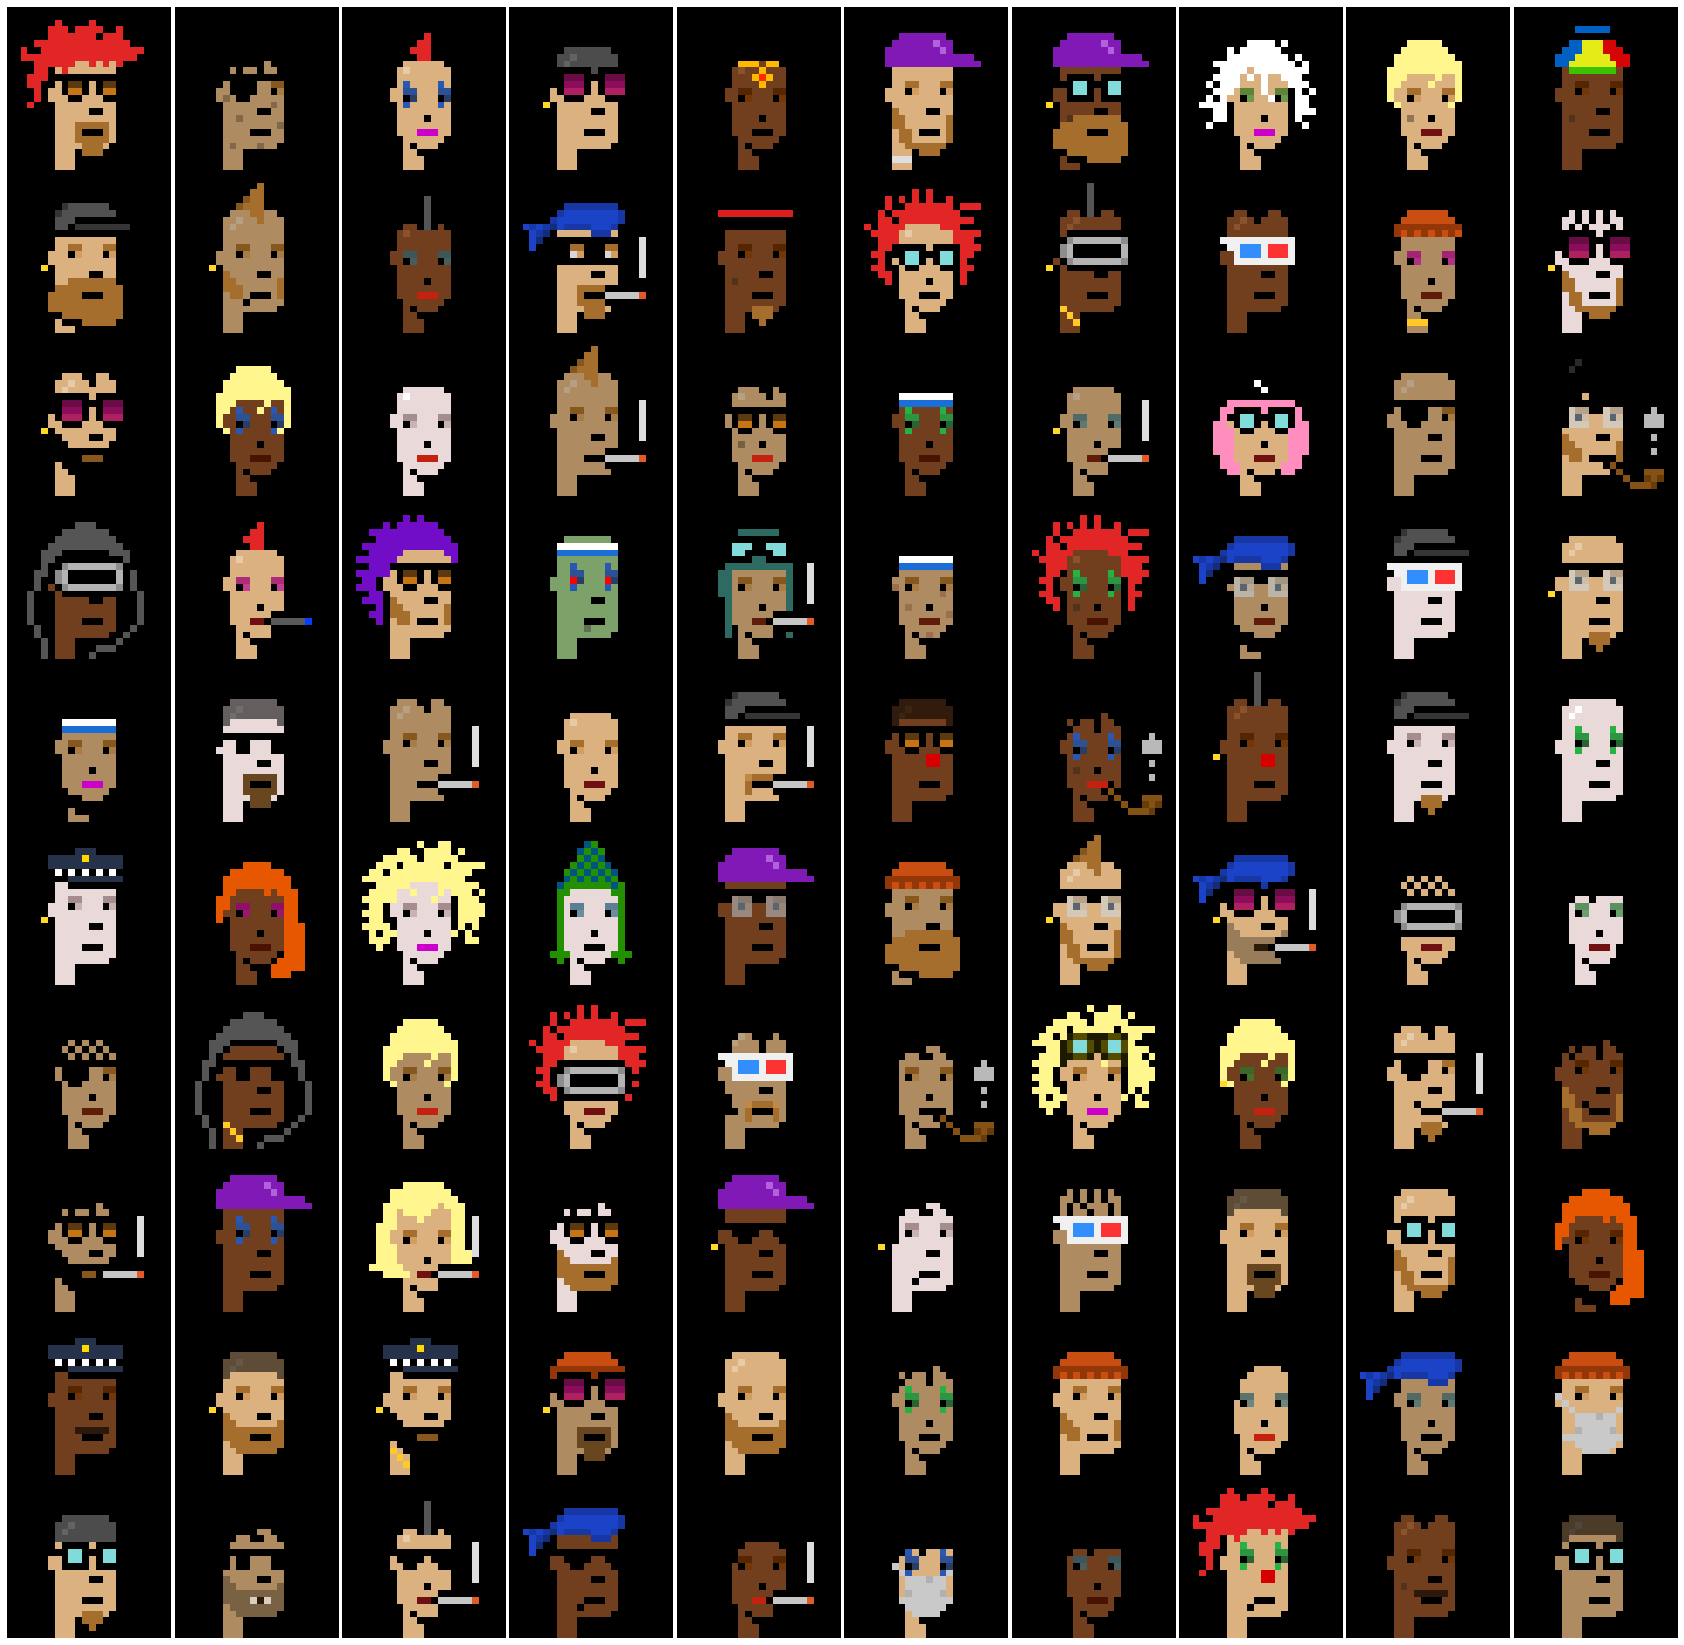

In [5]:
#look at 100 samples

#define number of rows and cols
no_plots = 10*10

#define path
images = glob.glob("../input/cryptopunks/imgs/imgs/*.png")

plt.rcParams['figure.figsize'] = (30, 30)
plt.subplots_adjust(wspace=0, hspace=0)

print("Sample 100 CryptoPunks")
for idx,image in enumerate(images[:no_plots]):
    sample_img = cv.imread(image)
    plt.subplot(10, 10, idx+1)
    plt.axis('off')
    plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB)) #covert color space
plt.show()

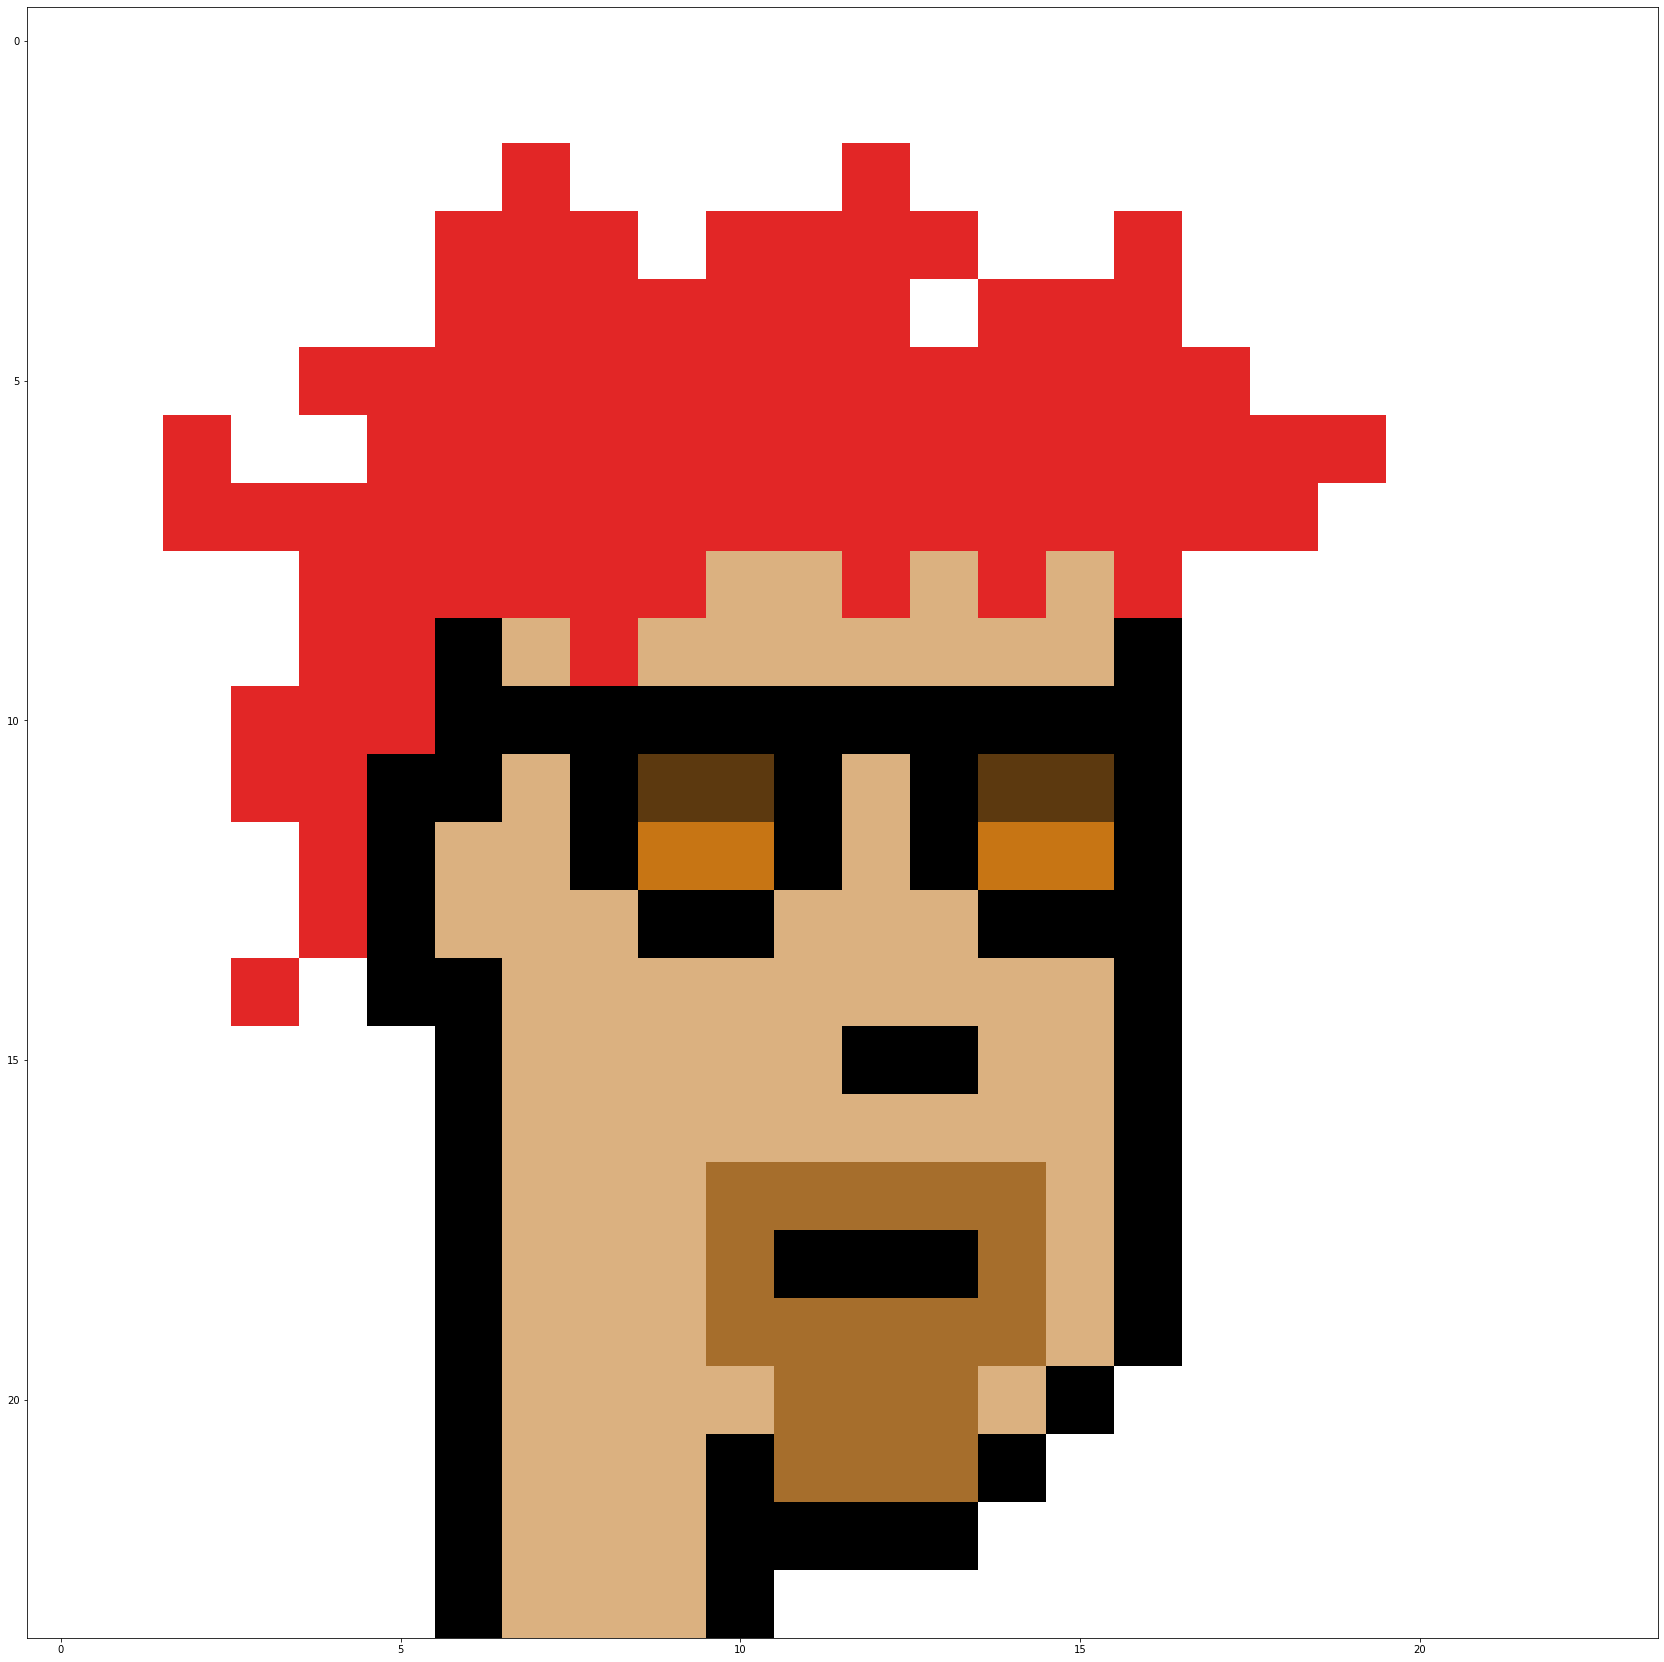

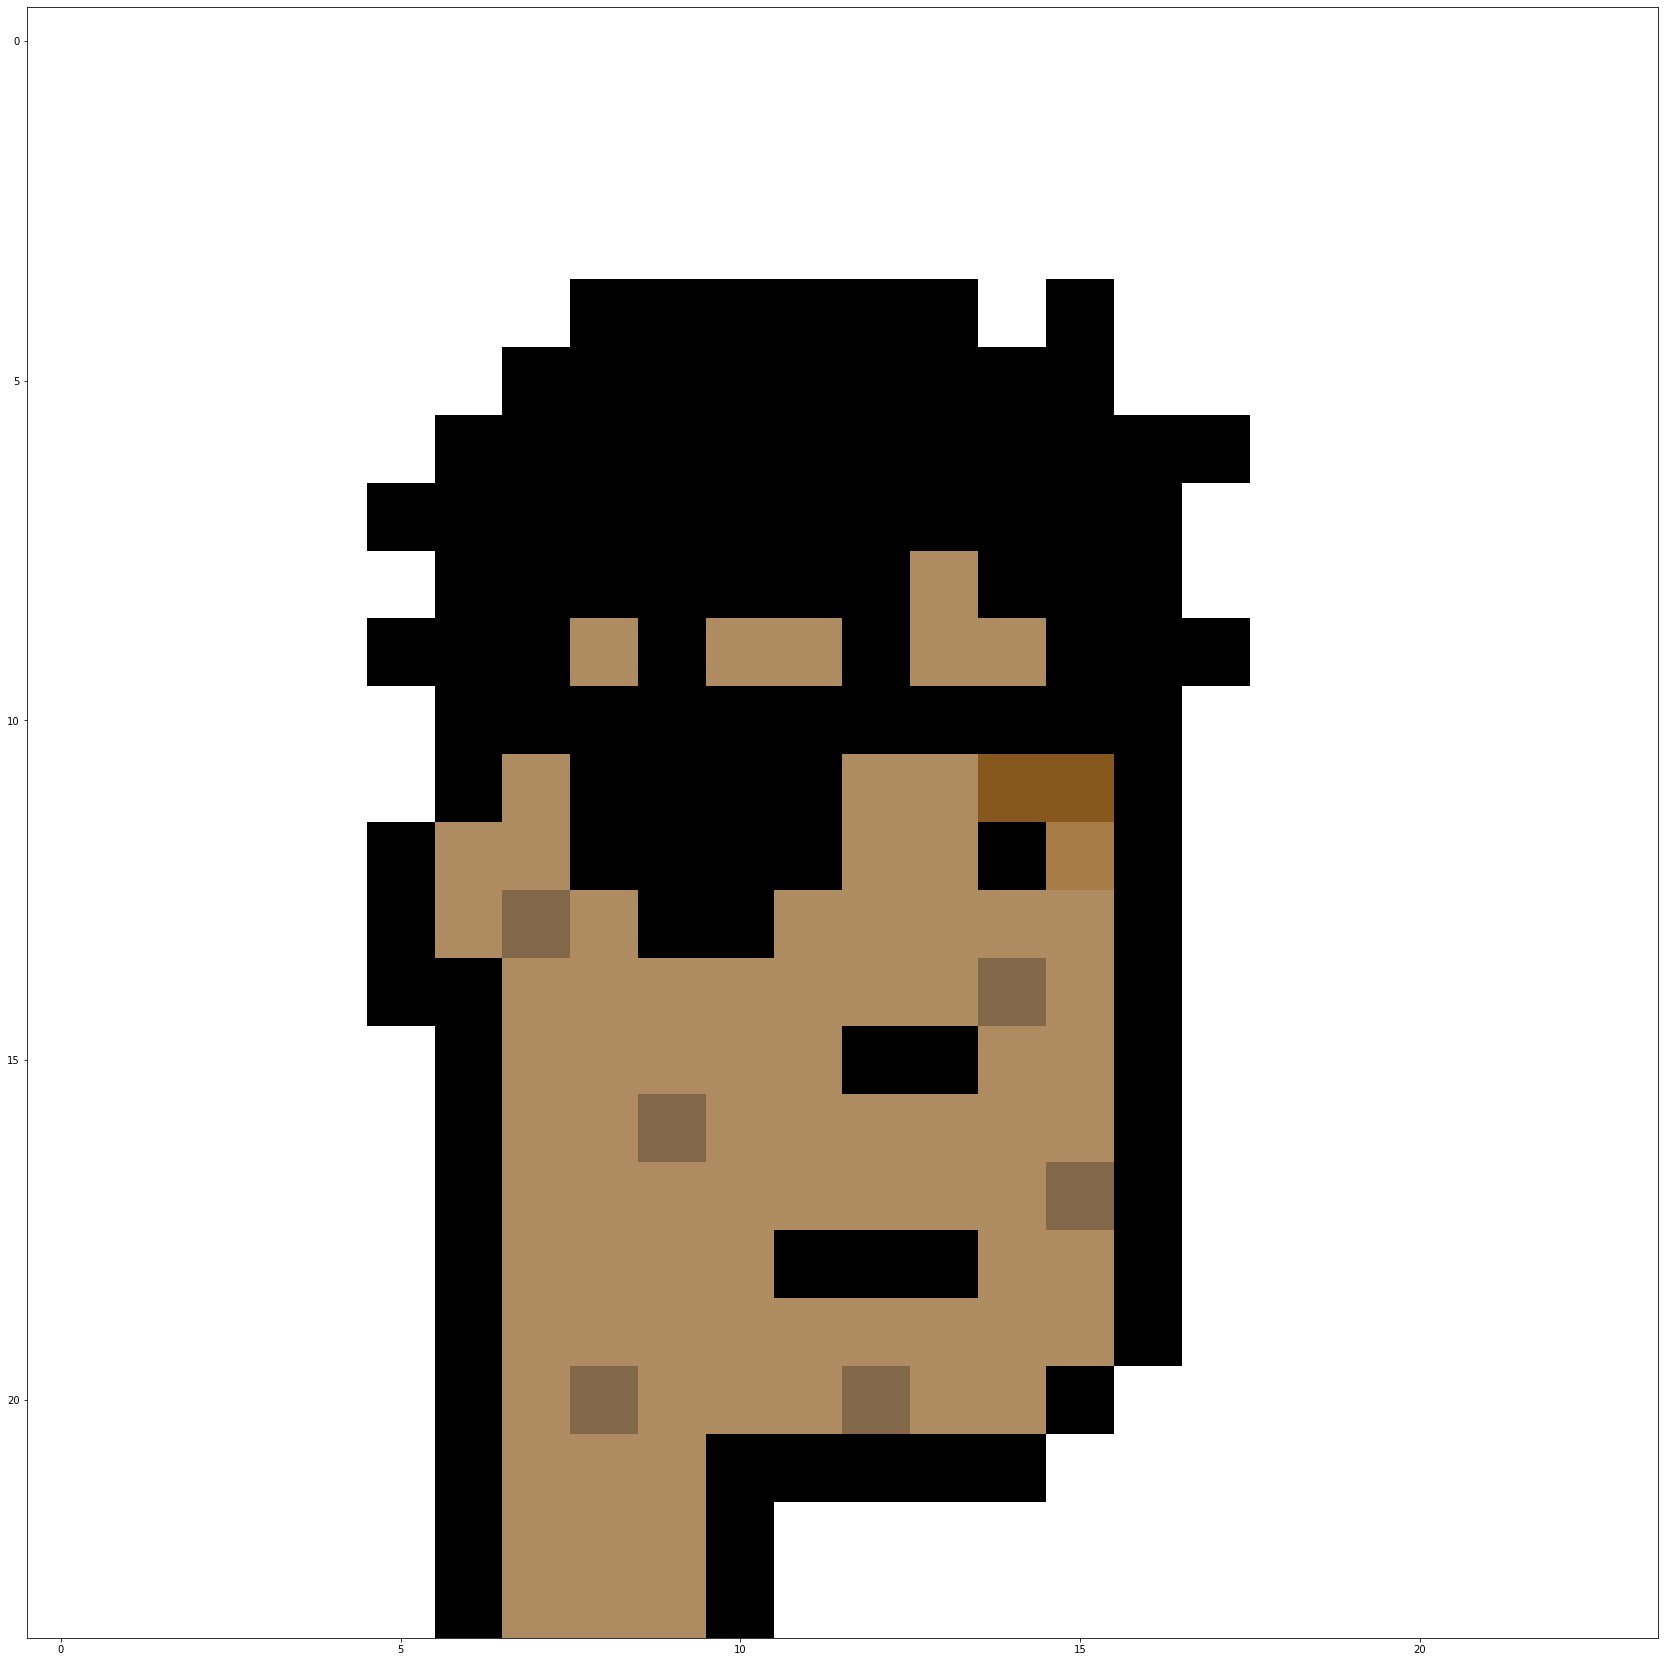

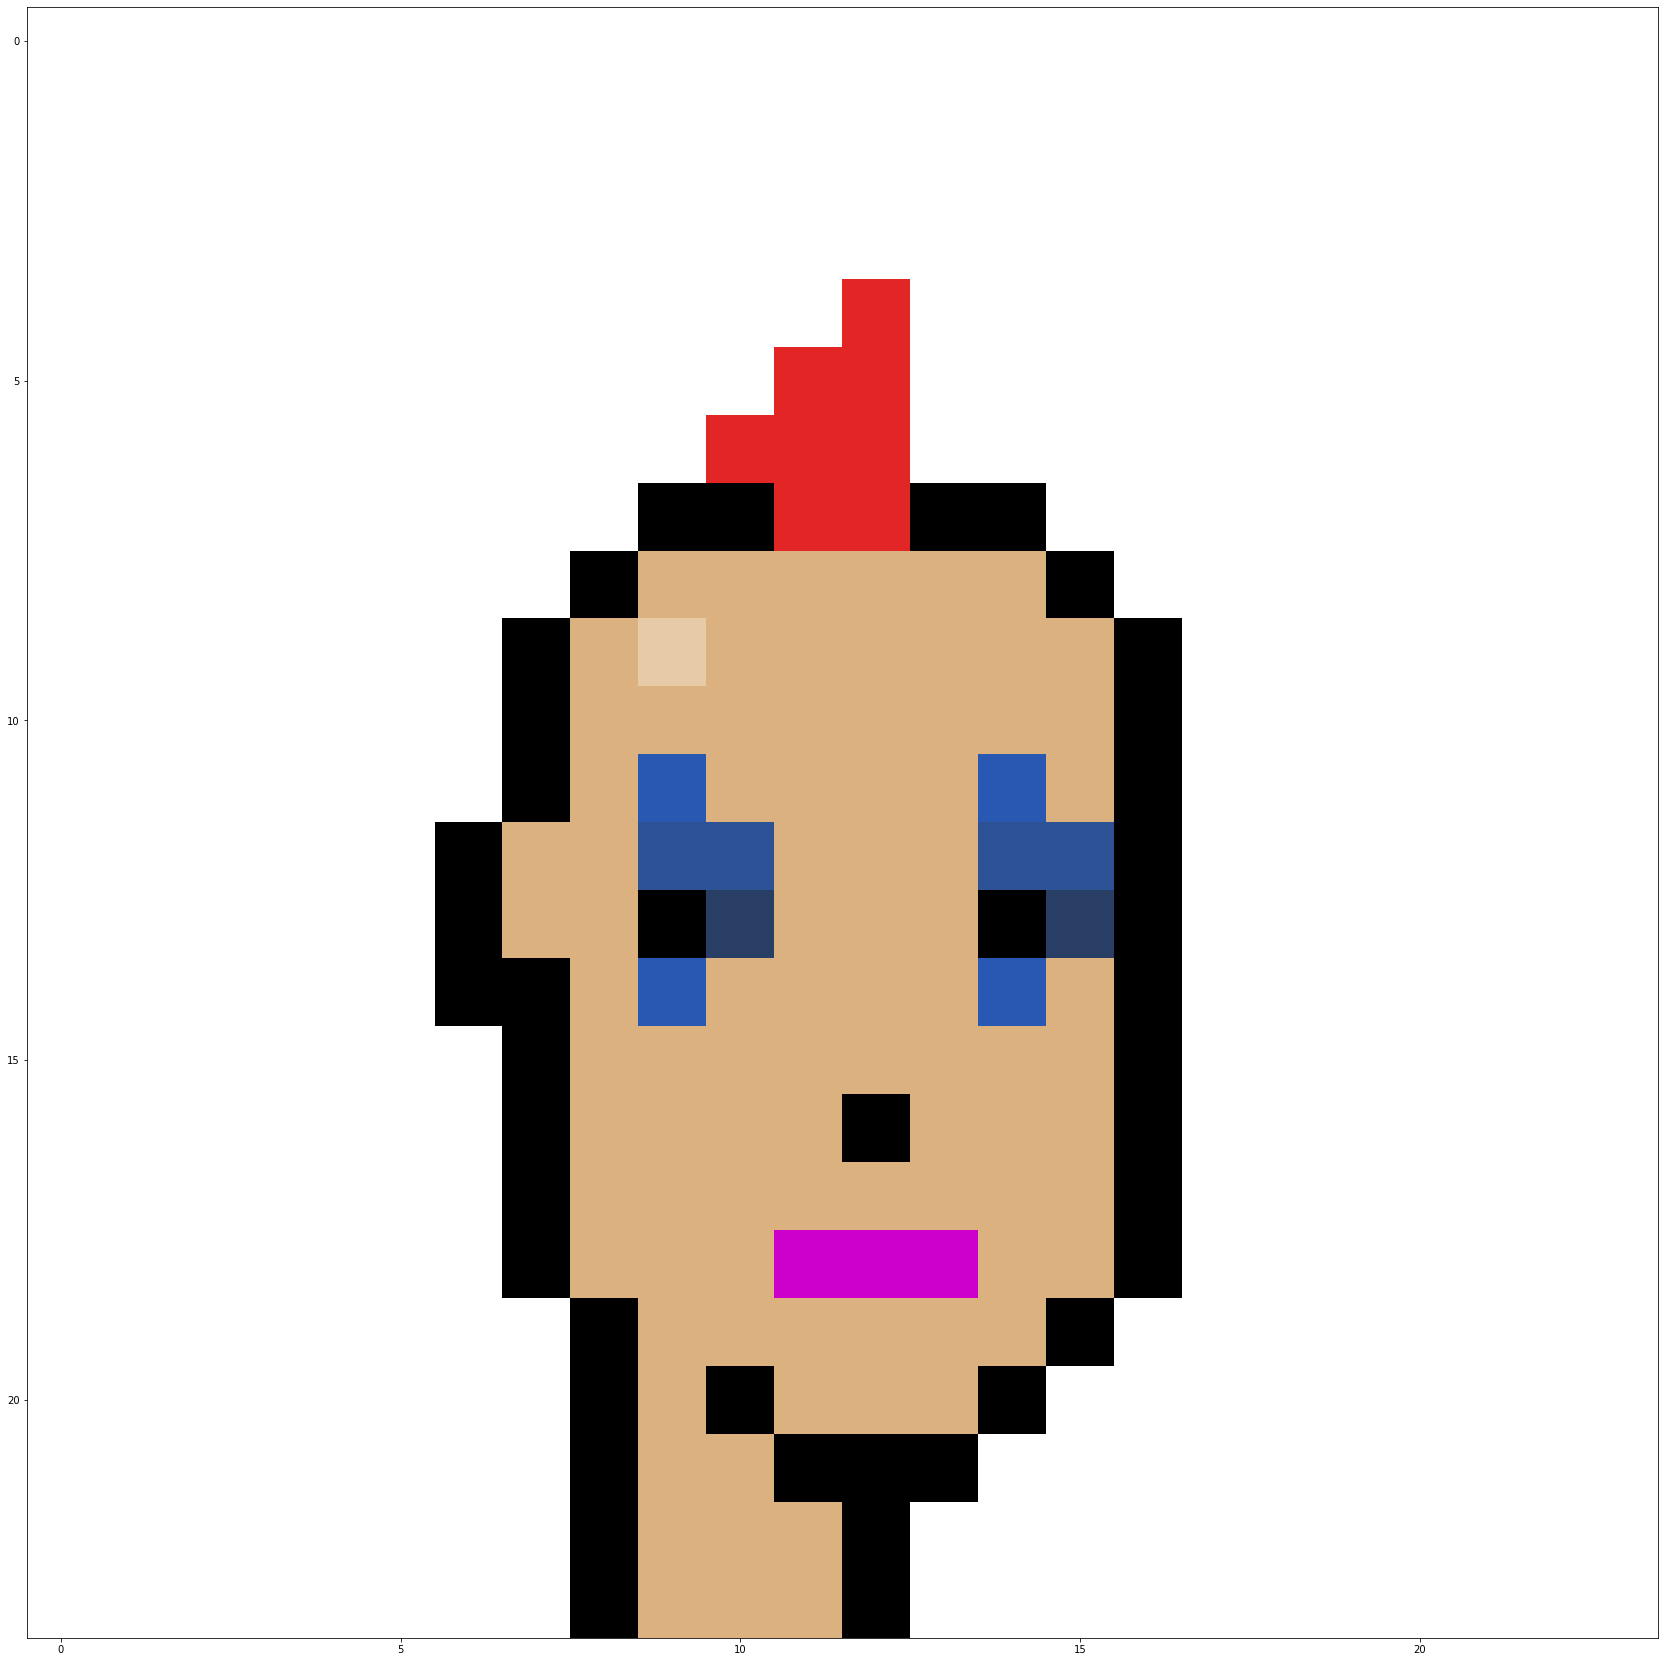

In [6]:
punks = [img for img in glob.glob("../input/cryptopunks/imgs/imgs/*.png")]

for punk in punks[0:3]:
    img = plt.imread(punk)
    plt.imshow(img)
    plt.show()

In [7]:
#check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [8]:
#create new dataframe with only useful columns
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
df.head()

txn_type       date    eth  punk_id      type  \
0  Bid Withdrawn 2021-09-04  321.0        0  [Female]   
1            Bid 2021-09-01  321.0        0  [Female]   
2  Bid Withdrawn 2021-09-01  320.0        0  [Female]   
3            Bid 2021-09-01  320.0        0  [Female]   
4  Bid Withdrawn 2021-09-01  263.0        0  [Female]   

                               accessories  
0  [Green Eye Shadow, Earring, Blonde Bob]  
1  [Green Eye Shadow, Earring, Blonde Bob]  
2  [Green Eye Shadow, Earring, Blonde Bob]  
3  [Green Eye Shadow, Earring, Blonde Bob]  
4  [Green Eye Shadow, Earring, Blonde Bob]

In [9]:
#value counts
df['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [10]:
df['accessories'].explode().unique()

array(['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk',
       'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat',
       'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair',
       'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard',
       'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow',
       'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark',
       'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde',
       'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair',
       'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana',
       'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars',
       'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black',
       'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard',
       'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap',
       'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch',
       'Headband', 'Cowbo

In [11]:
len(df['accessories'].explode().unique())

88

In [12]:
#exploded 'type' list to rows of the subset columns
df = df.explode("type")
df.head()

txn_type       date    eth  punk_id    type  \
0  Bid Withdrawn 2021-09-04  321.0        0  Female   
1            Bid 2021-09-01  321.0        0  Female   
2  Bid Withdrawn 2021-09-01  320.0        0  Female   
3            Bid 2021-09-01  320.0        0  Female   
4  Bid Withdrawn 2021-09-01  263.0        0  Female   

                               accessories  
0  [Green Eye Shadow, Earring, Blonde Bob]  
1  [Green Eye Shadow, Earring, Blonde Bob]  
2  [Green Eye Shadow, Earring, Blonde Bob]  
3  [Green Eye Shadow, Earring, Blonde Bob]  
4  [Green Eye Shadow, Earring, Blonde Bob]

In [13]:
#visualize
fig = px.bar(df[df.txn_type == 'Sold'].groupby("type").agg({"eth": "max"}).sort_values(by="eth").reset_index('type'),
             x="type", 
             y="eth", 
             color="type", 
             title="CryptoPunk Types vs. Price")
fig.show()

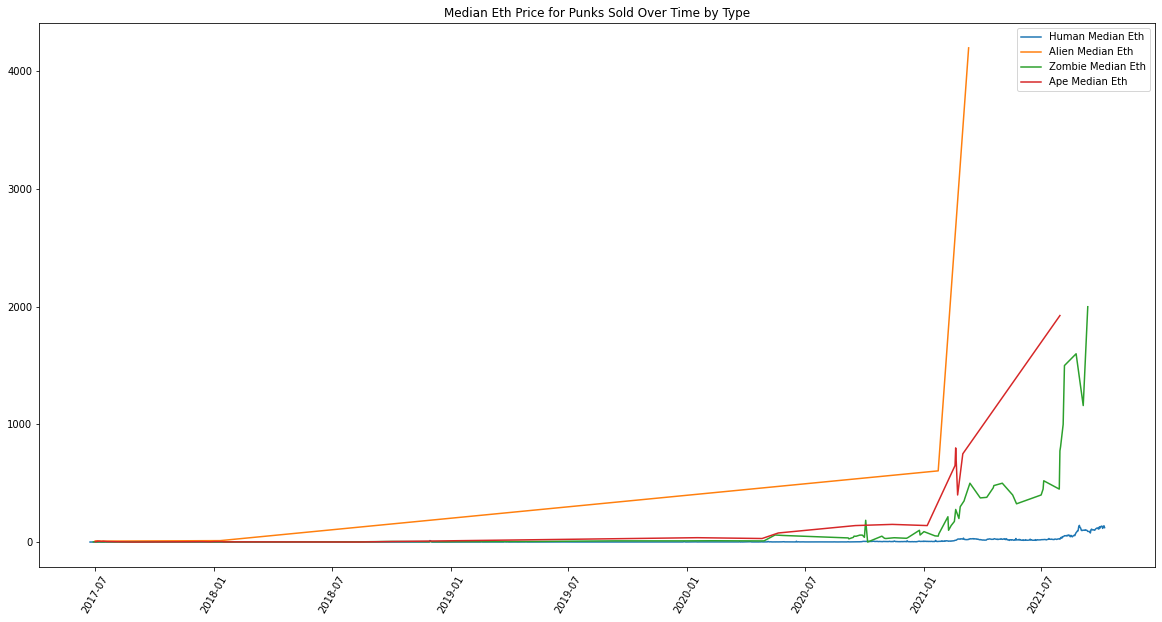

In [14]:
#visualize human
human = df[(df.txn_type == 'Sold') & ((df.type == "Female") | (df.type == "Male")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize alien
alien = df[(df.txn_type == 'Sold') & ((df.type == "Alien")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize zombie
zombie = df[(df.txn_type == 'Sold') & ((df.type == "Zombie")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize ape
ape = df[(df.txn_type == 'Sold') & ((df.type == "Ape")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(20,10))
plt.plot(human['date'], 
         human['eth']['median'], 
         label="Human Median Eth")

plt.plot(alien['date'], 
         alien['eth']['median'], 
         label="Alien Median Eth")

plt.plot(zombie['date'], 
         zombie['eth']['median'], 
         label="Zombie Median Eth")

plt.plot(ape['date'], 
         ape['eth']['median'], 
         label="Ape Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [15]:
#get number of attributes
df['num_attributes'] = df.accessories.apply(lambda x: len(x))

In [16]:
#compare number of attributes vs. price
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Female") | (df.type == "Male"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Human Punks")
fig.show()

In [17]:
#visualize number of attributes vs price for alien
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Alien"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Alien Punks")
fig.show()

In [18]:
#visualize number of attributes vs price for zombie
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Zombie"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Zombie Punks")
fig.show()

In [19]:
#visualize number of attributes vs price for ape
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Ape"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Ape Punks")
fig.show()

# DataLoader & Preprocessing

In [20]:
#display tensor image
def tensor_imshow(img, dnorm=True):
    img = img.to('cpu')
    npimg = img.detach().numpy()
    if dnorm:
        npimg = npimg*0.5+0.5
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [21]:
def get_dataloader(batch_size,           #batch size during training
                   image_size,           #spatial size of training images
                   data_dir=image_dir,   #root directory for dataset
                   num_workers=3):       #number of sub-processes
    
    stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) 
    
    #create transformer to transform images
    transform = transforms.Compose([transforms.Resize((image_size, image_size)),  #resize
                                    transforms.ToTensor(),                        #convert to tensor
                                    transforms.Normalize(*stats)])                #normalize to be between -1 and 1
    
    #create the dataset
    dataset = datasets.ImageFolder(root=data_dir,
                                   transform=transform)
    
    #create the dataloader
    data_loader = torch.utils.data.DataLoader(dataset,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=True)
    
    return data_loader

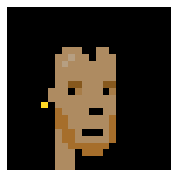

In [22]:
#test dataloader
batch_size, image_size = 5, 24

train_loader = get_dataloader(batch_size,
                              image_size,
                              image_root)

dataiter = iter(train_loader) #dataloader is an iterator

img,_ = next(dataiter)
sample_img = img[-1]

#display tensor image
tensor_imshow(sample_img)

# Build Generator

In [23]:
class Generator(nn.Module):       #signals neural network
    def __init__(self, 
                 z_dim=100,      #noise vector
                 im_chan=3,      #color chanel, 3 for red green blue
                 hidden_dim=64): #spatial size of feature map (conv)
        
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.im_chan = im_chan
        self.hidden_dim = hidden_dim
        
        self.generator_cnn = nn.Sequential(self.make_gen_block(z_dim, hidden_dim*8, stride=1, padding=0),   
                                           #(64*8) x 4 x 4
                                           self.make_gen_block(hidden_dim*8, hidden_dim*4),                           
                                           #(64*4) x 8 x 8
                                           self.make_gen_block(hidden_dim*4, hidden_dim*2),                           
                                           #(64*2) x 16 x 16
                                           self.make_gen_block(hidden_dim*2, hidden_dim),                             
                                           #(64) x 32 x 32
                                           self.make_gen_block(hidden_dim, im_chan, final_layer=True))
    
    def make_gen_block(self, 
                       im_chan,     #image dimension
                       op_chan,     #output dimension
                       kernel_size=4, 
                       stride=2, 
                       padding=1, 
                       final_layer=False): 
        
        layers = []
        #de-convolutional layer
        layers.append(nn.ConvTranspose2d(im_chan,     
                                         op_chan, 
                                         kernel_size, 
                                         stride, 
                                         padding, 
                                         bias=False))
        
        if not final_layer:
            layers.append(nn.BatchNorm2d(op_chan))
            layers.append(nn.LeakyReLU(0.2))
        else:
            layers.append(nn.Tanh())
        
        return nn.Sequential(*layers)
    
    def forward(self,noise):
        x = noise.view(-1,self.z_dim,1,1)
        return self.generator_cnn(x)

    def get_noise(n_samples, 
                  z_dim, 
                  device='cpu'):
        return torch.randn(n_samples, 
                           z_dim, 
                           device=device)

In [24]:
#test Generator
noise = Generator.get_noise(n_samples=5,
                            z_dim=100)

g = Generator(z_dim=100,
              im_chan=3,
              hidden_dim=64)

In [25]:
print(g)

Generator(
  (generator_cnn): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

# Build Discriminator

In [26]:
class Discriminator(nn.Module):
    def __init__(self, 
                 im_chan=3,       #image channels, 3 for red green blue
                 conv_dim=64,     #spatial dimension of feature map
                 image_size=64):  #spatial size of training images
        
        super(Discriminator, self).__init__()
        self.image_size = image_size
        self.conv_dim = conv_dim
        
        self.disc_cnn = nn.Sequential(self.make_disc_block(im_chan, conv_dim),
                                      self.make_disc_block(conv_dim, conv_dim*2),
                                      self.make_disc_block(conv_dim*2, conv_dim*4),
                                      self.make_disc_block(conv_dim*4, conv_dim*8),
                                      #no need a sigmoid here since it is included in the loss function
                                      self.make_disc_block(conv_dim*8, 1, padding=0, final_layer=True)) 
        
        
    def make_disc_block(self,
                        im_chan,
                        op_chan,
                        kernel_size=4,
                        stride=2,
                        padding=1,
                        final_layer=False):
        layers = []
        layers.append(nn.Conv2d(im_chan,
                                op_chan,
                                kernel_size,
                                stride,
                                padding,
                                bias=False))
        
        if not final_layer:
            layers.append(nn.BatchNorm2d(op_chan))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
        
        return nn.Sequential(*layers)
    
    #given an image tensor, returns a 1-dimension tensor representing fake/real
    def forward(self,image):
        pred = self.disc_cnn(image)
        pred = pred.view(image.size(0),-1)
        return pred
    
    def _get_final_feature_dimention(self):
        final_width_height = (self.image_size //  2**len(self.disc_cnn))**2
        final_depth = self.conv_dim * 2**(len(self.disc_cnn)-1)
        return final_depth*final_width_height

In [27]:
#test Discriminator
d = Discriminator(im_chan=3,
                  conv_dim=64,
                  image_size=64)

In [28]:
print(d)

Discriminator(
  (disc_cnn): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affi

# Define Training Parameters

In [29]:
#custom weights initialization to randomly initialize all weights
#mean=0, stdev=0.2
def weights_init_normal(m):
    
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02) 
        
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

In [30]:
def real_loss(D_out,device='cpu'):
    
    #initialize BCELoss function
    criterion = nn.BCEWithLogitsLoss()
    
    #batch size
    batch_size = D_out.size(0)
    
    #labels will be used when calculating the losses
    #real labels = 1 and lable smoothing => 0.9
    labels = torch.ones(batch_size, device=device)*0.9 
    
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [31]:
def fake_loss(D_out, device='cpu'):
    
    #initialize BCELoss function
    criterion = nn.BCEWithLogitsLoss()
    
    #batch size
    batch_size = D_out.size(0)
    
    #labels will be used when calculating the losses
    #fake labels = 0
    labels = torch.zeros(batch_size,
                         device=device) 
    
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [32]:
def print_tensor_images(images_tensor):
    
    '''
    Function for visualizing images: Given a tensor of images, prints the images.
    '''
        
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    images_tensor = images_tensor.to('cpu')
    npimgs = images_tensor.detach().numpy()
    
    no_plots = len(images_tensor)

    for idx,image in enumerate(npimgs):
        plt.subplot(1, 8, idx+1)
        plt.axis('off')
        #dnorm
        image = image * 0.5 + 0.5
        plt.imshow(np.transpose(image, (1, 2, 0)))
        
    plt.show()

In [33]:
def train(D, G, 
          n_epochs,
          dataloader,
          d_optimizer,
          g_optimizer,
          z_dim,
          print_every=50,
          device='cpu'):
    
    #to keep track of the generator’s learning progression, 
    #we will generate a fixed batch of latent vectors that are drawn from a Gaussian distribution   
    sample_size=8
    fixed_z = Generator.get_noise(n_samples=sample_size,
                                  z_dim=z_dim,
                                  device=device)
    
    for epoch in range(1,n_epochs+1):
        #use dataloader to fetch batches
        for batch_i,(real_images,_) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)
            
            #Part 1: Train the Discriminator ========================================================
            #goal: to maximize the probability of correctly classifying a given input as real or fake
            
            #zero out the gradients before backpropagation
            d_optimizer.zero_grad()
            
            ##classify all-real batch
            d_real_op = D(real_images) #average output (across the batch) of the discriminator
            d_real_loss = real_loss(d_real_op,
                                    device=device)
            
            #train with all-fake batch
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            fake_images = G(noise)
            
            #classify all-fake batch
            d_fake_op = D(fake_images) #average output (across the batch) of the generator
            d_fake_loss = fake_loss(d_fake_op,
                                    device=device)
            
            #total loss
            d_loss = d_real_loss + d_fake_loss
            
            #update gradients
            d_loss.backward()
            #update optimizer
            d_optimizer.step()
            
            #Part 2: Train the Generator ==============================================================
            #zero out the gradients before backpropagation
            g_optimizer.zero_grad()
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            
            #use discriminator to classify generator's output
            g_out = G(noise)
            d_out = D(g_out)
            
            g_loss = real_loss(d_out, 
                               device=device) 
            #update gradients
            g_loss.backward()
            #update optimizer
            g_optimizer.step()
        
        print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(epoch, 
                                                                               n_epochs, 
                                                                               d_loss.item(),  #keep track of loss
                                                                               g_loss.item())) #keep track of loss
        if (epoch % print_every == 0):
            G.eval()
            sample_image = G(fixed_z)
            print_tensor_images(sample_image)
            G.train()

## Train Time!

In [34]:
#hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is ", device)

#incorrect hyperparameter settings lead to mode collapse
#we will follow Goodfellow’s paper
z_dim = 100       #noise
beta_1 = 0.5      #as specified in the original DCGAN paper
beta_2 = 0.999 
lr = 0.0002       #as specified in the original DCGAN paper
n_epochs = 100
batch_size = 128
image_size = 64

Device is  cuda


In [35]:
#initialize generator
generator = Generator(z_dim, 
                      im_chan=3, 
                      hidden_dim=64).to(device)

#initialize discriminator
discriminator = Discriminator(im_chan=3, 
                              conv_dim=64, 
                              image_size=image_size).to(device)

#setup Adam optimizers for generator
g_optimizer = optim.Adam(generator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup Adam optimizers for discriminator
d_optimizer = optim.Adam(discriminator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup dataloader
dataloader = get_dataloader(batch_size, 
                            image_size, 
                            image_root)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Epoch [    1/  100] | d_loss: 1.3456 | g_loss: 15.6118
Epoch [    2/  100] | d_loss: 0.5506 | g_loss: 2.8426
Epoch [    3/  100] | d_loss: 1.5507 | g_loss: 1.9881
Epoch [    4/  100] | d_loss: 0.4780 | g_loss: 2.4650
Epoch [    5/  100] | d_loss: 0.5060 | g_loss: 3.7863
Epoch [    6/  100] | d_loss: 0.5553 | g_loss: 2.0921
Epoch [    7/  100] | d_loss: 0.6925 | g_loss: 1.5303
Epoch [    8/  100] | d_loss: 1.3093 | g_loss: 0.4924
Epoch [    9/  100] | d_loss: 0.4167 | g_loss: 4.6093
Epoch [   10/  100] | d_loss: 0.4420 | g_loss: 2.4211


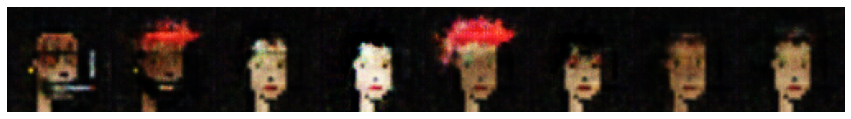

Epoch [   11/  100] | d_loss: 0.4358 | g_loss: 3.4711
Epoch [   12/  100] | d_loss: 0.4449 | g_loss: 2.7766
Epoch [   13/  100] | d_loss: 0.4269 | g_loss: 2.9615
Epoch [   14/  100] | d_loss: 0.6709 | g_loss: 1.3596
Epoch [   15/  100] | d_loss: 0.5336 | g_loss: 1.3208
Epoch [   16/  100] | d_loss: 1.0541 | g_loss: 3.9855
Epoch [   17/  100] | d_loss: 0.3781 | g_loss: 4.3806
Epoch [   18/  100] | d_loss: 0.4759 | g_loss: 3.9514
Epoch [   19/  100] | d_loss: 0.3892 | g_loss: 2.8006
Epoch [   20/  100] | d_loss: 0.4909 | g_loss: 3.5161


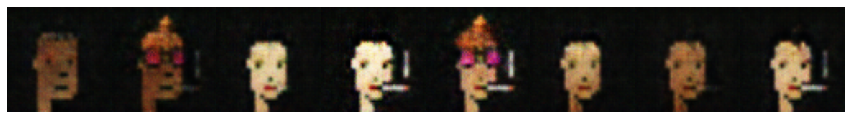

Epoch [   21/  100] | d_loss: 0.7145 | g_loss: 1.2124
Epoch [   22/  100] | d_loss: 0.3788 | g_loss: 5.8924
Epoch [   23/  100] | d_loss: 0.3389 | g_loss: 5.2652
Epoch [   24/  100] | d_loss: 0.3429 | g_loss: 4.3792
Epoch [   25/  100] | d_loss: 0.6929 | g_loss: 2.1386
Epoch [   26/  100] | d_loss: 0.3753 | g_loss: 4.0361
Epoch [   27/  100] | d_loss: 0.4354 | g_loss: 2.4529
Epoch [   28/  100] | d_loss: 0.3605 | g_loss: 4.1508
Epoch [   29/  100] | d_loss: 0.4381 | g_loss: 4.6676
Epoch [   30/  100] | d_loss: 0.3931 | g_loss: 5.4999


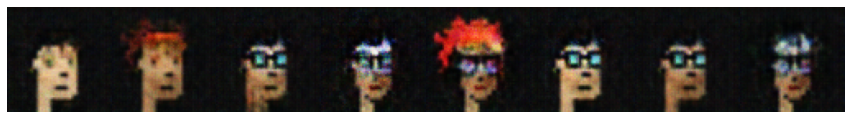

Epoch [   31/  100] | d_loss: 0.4927 | g_loss: 2.6585
Epoch [   32/  100] | d_loss: 0.3878 | g_loss: 5.4117
Epoch [   33/  100] | d_loss: 0.4500 | g_loss: 2.2396
Epoch [   34/  100] | d_loss: 0.3396 | g_loss: 5.3880
Epoch [   35/  100] | d_loss: 0.4545 | g_loss: 1.8659
Epoch [   36/  100] | d_loss: 0.3387 | g_loss: 6.8303
Epoch [   37/  100] | d_loss: 0.5420 | g_loss: 1.4503
Epoch [   38/  100] | d_loss: 0.3385 | g_loss: 5.3542
Epoch [   39/  100] | d_loss: 0.4991 | g_loss: 1.0583
Epoch [   40/  100] | d_loss: 0.4944 | g_loss: 2.5894


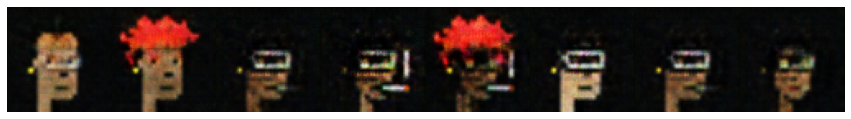

Epoch [   41/  100] | d_loss: 0.4282 | g_loss: 7.2675
Epoch [   42/  100] | d_loss: 0.3424 | g_loss: 6.1666
Epoch [   43/  100] | d_loss: 0.3699 | g_loss: 5.4141
Epoch [   44/  100] | d_loss: 0.3489 | g_loss: 5.4245
Epoch [   45/  100] | d_loss: 0.3841 | g_loss: 4.2463
Epoch [   46/  100] | d_loss: 1.0281 | g_loss: 1.9001
Epoch [   47/  100] | d_loss: 0.5857 | g_loss: 2.0663
Epoch [   48/  100] | d_loss: 0.3684 | g_loss: 5.8835
Epoch [   49/  100] | d_loss: 0.6099 | g_loss: 1.9791
Epoch [   50/  100] | d_loss: 0.3619 | g_loss: 3.8026


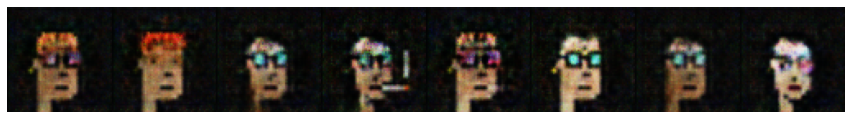

Epoch [   51/  100] | d_loss: 0.3404 | g_loss: 4.4801
Epoch [   52/  100] | d_loss: 0.3443 | g_loss: 5.3624
Epoch [   53/  100] | d_loss: 0.5228 | g_loss: 6.1472
Epoch [   54/  100] | d_loss: 0.4615 | g_loss: 2.9411
Epoch [   55/  100] | d_loss: 0.3343 | g_loss: 5.1465
Epoch [   56/  100] | d_loss: 1.0679 | g_loss: 0.5225
Epoch [   57/  100] | d_loss: 0.3572 | g_loss: 4.3810
Epoch [   58/  100] | d_loss: 0.6683 | g_loss: 1.8338
Epoch [   59/  100] | d_loss: 0.4407 | g_loss: 3.3876
Epoch [   60/  100] | d_loss: 0.4447 | g_loss: 2.7811


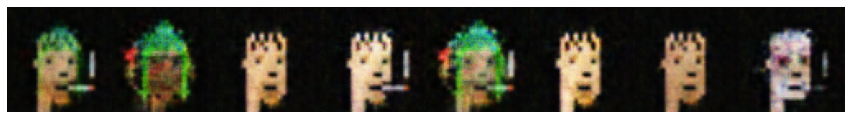

Epoch [   61/  100] | d_loss: 0.3730 | g_loss: 4.4297
Epoch [   62/  100] | d_loss: 0.4325 | g_loss: 2.6251
Epoch [   63/  100] | d_loss: 0.3388 | g_loss: 5.0989
Epoch [   64/  100] | d_loss: 0.5140 | g_loss: 2.6115
Epoch [   65/  100] | d_loss: 0.4477 | g_loss: 1.9694
Epoch [   66/  100] | d_loss: 0.3485 | g_loss: 5.2170
Epoch [   67/  100] | d_loss: 0.3608 | g_loss: 2.8925
Epoch [   68/  100] | d_loss: 0.3434 | g_loss: 4.9373
Epoch [   69/  100] | d_loss: 0.3426 | g_loss: 5.9913
Epoch [   70/  100] | d_loss: 1.1441 | g_loss: 1.5566


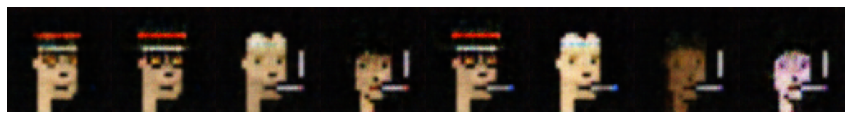

Epoch [   71/  100] | d_loss: 1.4511 | g_loss: 0.4129
Epoch [   72/  100] | d_loss: 0.3418 | g_loss: 5.7380
Epoch [   73/  100] | d_loss: 0.3505 | g_loss: 4.4697
Epoch [   74/  100] | d_loss: 0.4288 | g_loss: 6.8898
Epoch [   75/  100] | d_loss: 0.3570 | g_loss: 4.6605
Epoch [   76/  100] | d_loss: 0.6597 | g_loss: 0.8801
Epoch [   77/  100] | d_loss: 2.2362 | g_loss: 0.4992
Epoch [   78/  100] | d_loss: 0.3420 | g_loss: 4.5517
Epoch [   79/  100] | d_loss: 1.3032 | g_loss: 1.2032
Epoch [   80/  100] | d_loss: 0.3539 | g_loss: 5.0370


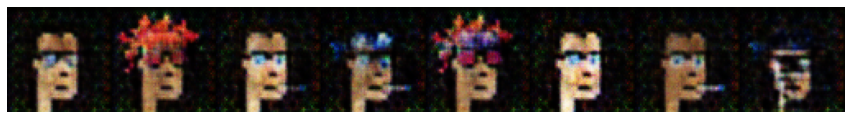

Epoch [   81/  100] | d_loss: 0.7562 | g_loss: 1.3186
Epoch [   82/  100] | d_loss: 0.5983 | g_loss: 2.5687
Epoch [   83/  100] | d_loss: 0.6486 | g_loss: 2.8136
Epoch [   84/  100] | d_loss: 0.7139 | g_loss: 0.7823
Epoch [   85/  100] | d_loss: 0.5091 | g_loss: 2.3066
Epoch [   86/  100] | d_loss: 1.0134 | g_loss: 0.5989
Epoch [   87/  100] | d_loss: 0.6542 | g_loss: 1.5540
Epoch [   88/  100] | d_loss: 0.3464 | g_loss: 4.5161
Epoch [   89/  100] | d_loss: 0.5479 | g_loss: 1.5462
Epoch [   90/  100] | d_loss: 0.3381 | g_loss: 6.5957


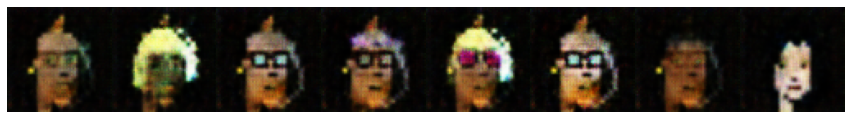

Epoch [   91/  100] | d_loss: 0.3357 | g_loss: 5.7568
Epoch [   92/  100] | d_loss: 0.5403 | g_loss: 5.4537
Epoch [   93/  100] | d_loss: 0.3670 | g_loss: 5.5537
Epoch [   94/  100] | d_loss: 0.3759 | g_loss: 6.0546
Epoch [   95/  100] | d_loss: 0.5223 | g_loss: 3.0464
Epoch [   96/  100] | d_loss: 0.3441 | g_loss: 4.1815
Epoch [   97/  100] | d_loss: 0.4392 | g_loss: 4.1590
Epoch [   98/  100] | d_loss: 1.4355 | g_loss: 0.4856
Epoch [   99/  100] | d_loss: 0.3439 | g_loss: 4.9246
Epoch [  100/  100] | d_loss: 1.1798 | g_loss: 1.7704


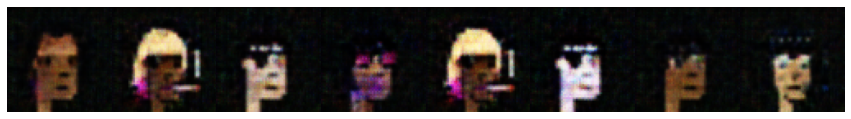

In [36]:
#start training
%time
n_epochs = 100
train(discriminator,
      generator,
      n_epochs,
      dataloader,
      d_optimizer,
      g_optimizer,
      z_dim,
      print_every=10,
      device=device)

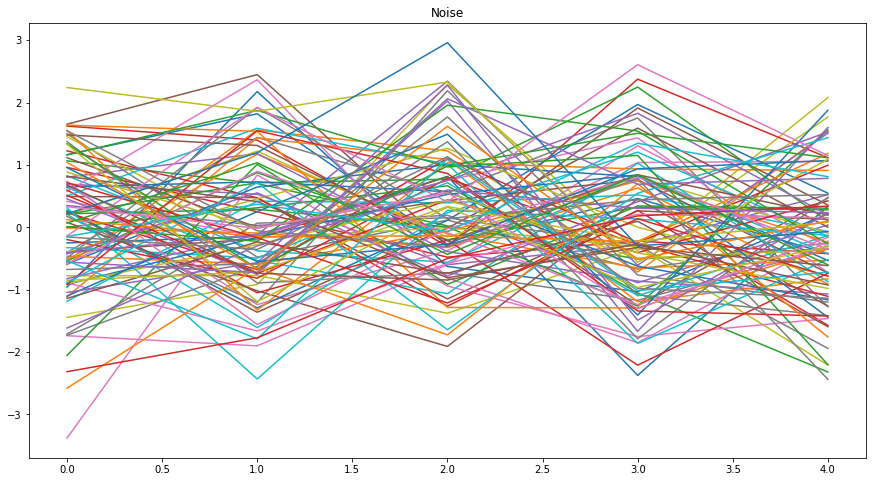

In [37]:
plt.figure(figsize = (15, 8))
plt.plot(noise)
plt.title("Noise")
plt.show()

In [38]:
def save_model(generator,file_name):
    generator = generator.to('cuda')
    torch.save(generator.state_dict(),"cryptopunks_generator.pth")

save_model(generator,"kaggle")

# Create New CryptoPunks

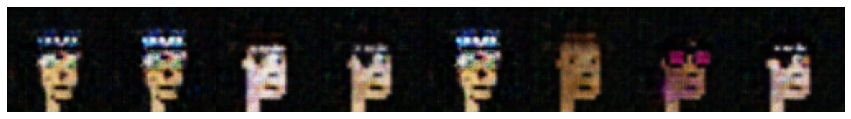

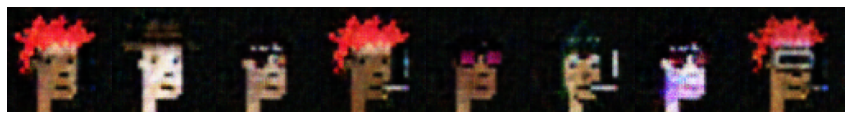

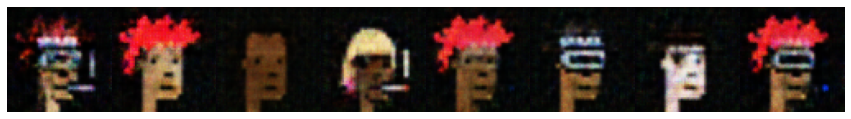

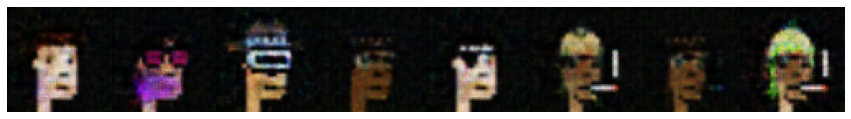

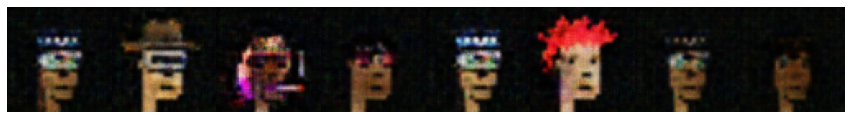

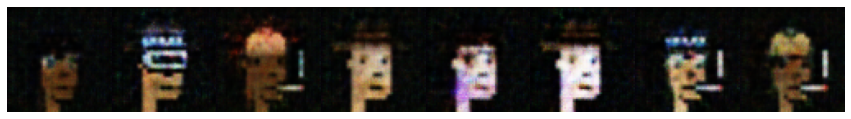

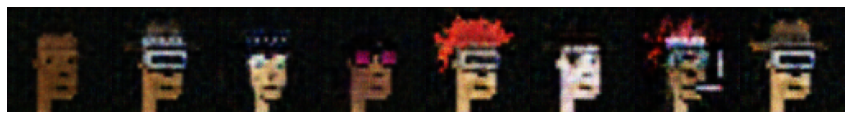

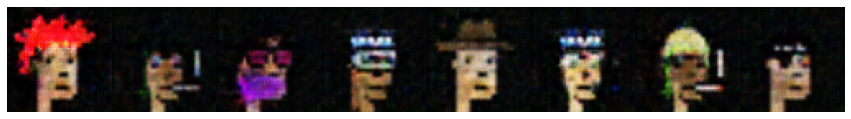

In [39]:
#sample generation
generator.to(device)
generator.eval()       #eval mode
sample_size=8

for i in range(8):    
    
    #generate latent vectors
    fixed_z = Generator.get_noise(n_samples=sample_size, 
                                  z_dim=z_dim, 
                                  device=device)    
    
    #generate samples
    sample_image = generator(fixed_z)
    
    #display samples
    print_tensor_images(sample_image)